# Introdução Machine Learning - Data ICMC-USP

## Tarefa Aula 01 - k-Nearest Neighbors

Esse material foi desenvolvido pelo **Data**, grupo de extensão de aprendizado e ciência de dados compostos por alunos do Instituto de Ciências Matemáticas e de Computação da USP

Para saber mais sobre as atividades do Data entre no nosso site e nos siga e nossas redes sociais:
- [Site](http://data.icmc.usp.br/)
- [Twitter](https://twitter.com/data_icmc)
- [LinkedIn](https://www.linkedin.com/school/data-icmc/)
- [Facebook](https://www.facebook.com/dataICMC/)

Aproveite o material!

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Vamos começar carregando os dados que iremos usar no nossa tarefa. Esses dados fornecem várias informações a respeito de diferentes vinhos e o objetivo é classificar se o vinho é bom (target é a coluna *is_good*).

Esse conjunto de dados é uma modificação do conjunto 

In [22]:
import os

In [30]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Leia os dados de data.csv com pd.read_csv e guarde      #
# na variável df                                             #
##############################################################
df = pd.read_csv("./vinho.csv")

##############################################################

df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is good
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0.0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,1.0


In [31]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Guarde o shape do DataFrame na viarável  shape          #
##############################################################

shape = df.shape

##############################################################

print(shape)

(1599, 12)


In [32]:
for col in df.columns:
    print(col)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
is good


### Deixando os dados na mesma escala
Para vários algoritmos é importante deixarmos os dados em uma mesma escala, e o kNN um desses casos. Para entender melhor vamos olhar o exemplo a seguir:

<img src="grafico_escala.png" style="width: 400px"/>

Nesse caso a distância entre os dois pontos é dada por

$$
\begin{align*}
\text{dist}(x^{(1)}, x^{(2)}) &= \sqrt{(x^{(1)}_1 - x^{(2)}_1)^2 + (x^{(1)}_2 - x^{(2)}_2)^2} \\
  &= \sqrt{(3 - 2)^2 + (10000 - 9000)^2} \\
  &= \sqrt{1 + 1000000} \\
  &= \sqrt{1000001} \\
  &= 1000.0005
\end{align*}$$


Como as escalas são muito diferentes o primeiro atributo acaba não interferindo em praticamente nada no resultado da distância. E é importante perceber que esse tipo de situação ocorre com frequência em conjuntos de dados reais.

Existem diversas formas de tratar essa situação, aqui usaremos uma técnica chamada **Min-Max Scaling**, que transforma os dados deixando-os no intervalo $[0, 1]$. A formula é da transformação é a seguinte:

$$x^{(i)}_j \leftarrow \frac{x^{(i)}_j - min(x_j)}{max(x_j) - min(x_j)}$$

Em palavras significa que vamos subtrair o menor valor da atributo e dividir pela amplitude (diferença entre o máximo e o mínimo).


Pronto, agora que entendemos podemos fazer fazer isso para todas as nossas colunas utilizando a função interna do scikit-learn

In [33]:
%%time
##############################################################
#                       PREENCHA AQUI:                       #
# - Use MinMaxScaler implementada na Scikit-learn            #
#   para escalonar os dados                                  #
##############################################################

MinMax = MinMaxScaler()
MinMax.fit(df)
print(MinMax.transform(df))
df = pd.DataFrame(MinMax.transform(df), columns=df.columns)

##############################################################

# Vamos dar uma olhada no resultado do escalonamento
df.head()

[[0.24778761 0.39726027 0.         ... 0.13772455 0.15384615 0.        ]
 [0.28318584 0.52054795 0.         ... 0.20958084 0.21538462 0.        ]
 [0.28318584 0.43835616 0.04       ... 0.19161677 0.21538462 0.        ]
 ...
 [0.15044248 0.26712329 0.13       ... 0.25149701 0.4        1.        ]
 [0.11504425 0.35958904 0.12       ... 0.22754491 0.27692308 0.        ]
 [0.12389381 0.13013699 0.47       ... 0.19760479 0.4        1.        ]]
CPU times: user 7.27 ms, sys: 2.57 ms, total: 9.85 ms
Wall time: 7.54 ms


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is good
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0


### Divisão dos dados em treino e validação

In [36]:
target = 'is good'
features = df.columns.to_list()
features.remove(target)

X_train, X_val, y_train, y_val = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


### Treinando um modelo

In [37]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Instancie um KNeighborsClassifier na variável clf       #
#  - Treine o classificador com X_train e y_train            #
#  - Faça a predições para os dados de validade e salve      #
# em y_pred                                                  #
##############################################################
clf = KNeighborsClassifier(n_neighbors=5);

clf.fit(X_train, y_train);
y_pred = clf.predict(X_val)


##############################################################

### Avaliando o modelo treinado

In [38]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Calcule a acurácia do modelo que você treinou usando a  #
# função accuracy_score, salve o resultado e o imprima       #
##############################################################
acc = accuracy_score( y_val, y_pred)
##############################################################

print(f'A acurácia foi de {acc * 100:.2f}%')

A acurácia foi de 68.44%


### Explorando variações no modelo

#### Número de vizinhos

O principal hiperparâmetro do kNN é justamente o número de vizinhos, representado pelo k. Por padrão o `KNeighborsClassifier()` usa cinco vizinhos, através de seu parâmetro `n_neighbors` é possível alterar este valor.

#### Métrica de distância

Como vimos na aula, é possível utilizar diferentes metricas de distancia entre pontos, e vimos as duas seguintes:

- Distância Euclidiana => $dist(a, b) = \sqrt{\sum_i (a_i - b_i)^2}$
- Distância Manhattan => $dist(a, b) = \sum_i |a_i - b_i|$

O sklearn, por outro lado, faz uso de uma generalização destas duas distâncias, chamada distância **Minkowski** =>
$dist(a, b) = (\sum_i |a_i - b_i|^p)^\frac{1}{p}$. Perceba que com $p=2$ temos a distância Euclidiano e com $p=1$ temos a distância Manhattan. 

Por padrão a classe `KNeighborsClassifier()` usa `p=2`.

In [43]:
n_vizinhos = [3, 5, 7, 9, 11, 13]
resultados = []
acc = []
for k in n_vizinhos:
    ##############################################################
    #                       PREENCHA AQUI:                       #
    #  - Crie um kNN com k vizinhos e utilizando distância       #
    #    Manhattan                                                  #
    # - Treine esse modelo com X_train e y_train                 #
    # - Calcule a acurácia do modelo que você treinou e salve    #
    # o resultado na lista resultados                            #
    ##############################################################
    clf_manhatan = KNeighborsClassifier(n_neighbors=k, p=1)
    clf_manhatan.fit(X_train, y_train)
    y_pred = clf_manhatan.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    resultados.append(acc)
    

    ##############################################################

for k, acc in zip(n_vizinhos, resultados):
    print(f'{k:02d} vizinhos => Acurácia {acc * 100:.2f}%')

03 vizinhos => Acurácia 73.12%
05 vizinhos => Acurácia 74.38%
07 vizinhos => Acurácia 73.44%
09 vizinhos => Acurácia 70.62%
11 vizinhos => Acurácia 72.19%
13 vizinhos => Acurácia 70.94%


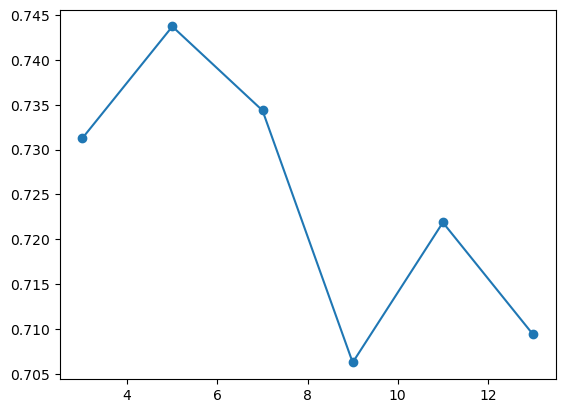

In [48]:
plt.plot(n_vizinhos, resultados, '-o')